# Evaluating our linear model - natural interpretibility
---
Regularised linear models performed surprisingly well on this complicated non linear task. My theory is that lateral inhibition explains this oddity. Lateral inhibition is where a neuron reduces the activity of its neighbors. The inputs to olfaction system actually sum linearly at the perceptual stage and because we are looking at the whole end to end relationship the mappings seem to be linear for our models too. 


In [1]:
# Math/Data Libraries
import scipy
import numpy as np
import pandas as pd

# Visalisation
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import shap

# I/O
import json
import xlrd
from sklearn.externals import joblib

# Jupyter/IPython Utility
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Paths

In [2]:
path_to_transformed_data = "../../../data/transformed/"
path_to_data = "../../../data/"
path_to_models = '../models/'

## Load data

In [3]:
data = pd.read_pickle(path_to_transformed_data + 'mean_training_set.zip')
X = data.iloc[:, 25:]
X['Odor dilution'] = data['Odor dilution']

## Load Model - Pleasantness

In [4]:
# Pleasantness - R = 0.59
lasso_ple_all = joblib.load(path_to_models + 'lasso_PLEASANTNESS_all.pkl')

In [5]:
model = lasso_ple_all.steps[3][1]

In [6]:
non_zero_coef = {}
above_point_one_coef = {}
count = -1
for coef in model.coef_:
    count+=1
    if coef > 0 or coef < 0:
        non_zero_coef[X.columns[count]] = coef
    if coef > 0.1 or coef < -0.1:
        above_point_one_coef[X.columns[count]] = coef
        

In [7]:
# We have 33 non-zero coefficients
len(non_zero_coef)
non_zero_coef
## 23 above 0.1 in absolute value
len(above_point_one_coef)
above_point_one_coef

33

{'MATS4v': -0.1918729530484575,
 'MATS7s': -0.6713772699444681,
 'GGI10': -0.0675063499346344,
 'JGI5': 0.05447794384119818,
 'P_VSA_LogP_5': 0.3595283571354044,
 'P_VSA_MR_8': -1.3279640016400616,
 'Eta_sh_x': 0.28898485581464234,
 'SM03_AEA(ri)': -0.37513381446432026,
 'SM04_AEA(ri)': -0.12319283577333189,
 'Eig08_EA(ed)': -0.008031917823727301,
 'Eig09_EA(ed)': -0.00010692478630331873,
 'Eig11_AEA(bo)': -0.03959350033889067,
 'Mor10u': -0.17270823584603126,
 'Mor13m': -0.749296082622855,
 'Mor30m': -0.14235915080758507,
 'Mor27i': 0.5405325341210911,
 'HATS8i': 0.17829832982001598,
 'R8e+': 0.8765918008264624,
 'nArCHO': 1.1993551520809764,
 'C-037': 1.543895327083674e-15,
 'H-052': 0.07944758276410656,
 'SaaO': -0.01930385708247827,
 'NdssC': 0.27376067650252894,
 'NssO': 1.41082036318964,
 'NssS': -0.844195471854501,
 'CATS2D_06_DA': 0.2132121198572818,
 'CATS2D_03_NL': -1.191106152974543,
 'CATS2D_07_NL': -0.18552898028505144,
 'CATS2D_03_LL': 0.04607948851259599,
 'B04[C-S]': -0

23

{'MATS4v': -0.1918729530484575,
 'MATS7s': -0.6713772699444681,
 'P_VSA_LogP_5': 0.3595283571354044,
 'P_VSA_MR_8': -1.3279640016400616,
 'Eta_sh_x': 0.28898485581464234,
 'SM03_AEA(ri)': -0.37513381446432026,
 'SM04_AEA(ri)': -0.12319283577333189,
 'Mor10u': -0.17270823584603126,
 'Mor13m': -0.749296082622855,
 'Mor30m': -0.14235915080758507,
 'Mor27i': 0.5405325341210911,
 'HATS8i': 0.17829832982001598,
 'R8e+': 0.8765918008264624,
 'nArCHO': 1.1993551520809764,
 'NdssC': 0.27376067650252894,
 'NssO': 1.41082036318964,
 'NssS': -0.844195471854501,
 'CATS2D_06_DA': 0.2132121198572818,
 'CATS2D_03_NL': -1.191106152974543,
 'CATS2D_07_NL': -0.18552898028505144,
 'B04[C-S]': -0.7063602302558412,
 'F04[C-S]': -0.16130945234905392,
 'Odor dilution': -0.8738142241446305}

Text(0.5,1,'PLEASANTNESS - All non-zero coefs')

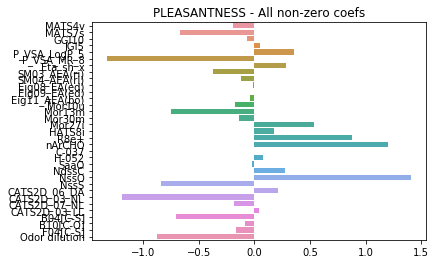

In [8]:
sb.barplot(y=list(non_zero_coef.keys()), x=list(non_zero_coef.values())).set_title('PLEASANTNESS - All non-zero coefs')


Text(0.5,1,'PLEASANTNESS - All non-zero coefs w/ magnitude > 0.1')

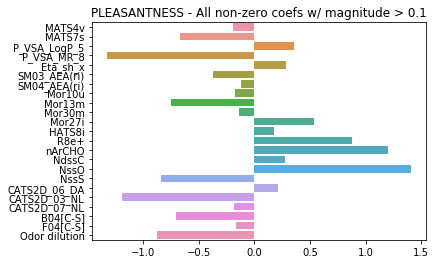

In [9]:
sb.barplot(y=list(above_point_one_coef.keys()), x=list(above_point_one_coef.values())).set_title('PLEASANTNESS - All non-zero coefs w/ magnitude > 0.1')


In [10]:
# Where our predictions begin for pleasentness
model.intercept_

45.61877817872189

## Intensity

In [11]:
# Intensity - R = 0.71
lasso_int_all = joblib.load(path_to_models + 'lasso_INTENSITY_all.pkl')

In [12]:
model = lasso_int_all.steps[3][1]

In [13]:
non_zero_coef = {}
above_point_one_coef = {}
count = -1
for coef in model.coef_:
    count+=1
    if coef > 0 or coef < 0:
        non_zero_coef[X.columns[count]] = coef
    if coef > 0.1 or coef < -0.1:
        above_point_one_coef[X.columns[count]] = coef
        

In [14]:
# 62 non-zero coefficients
len(non_zero_coef)
non_zero_coef
## 41 above 0.1 in absolute value
len(above_point_one_coef)
above_point_one_coef

62

{'PJI2': 0.19937422483037615,
 'X4Av': 0.5760791397787216,
 'X5Av': 1.6566199040442988,
 'ChiA_X': -0.7669753672771993,
 'MATS4s': -0.38939376553705535,
 'P_VSA_s_3': 0.0516196919207649,
 'SM10_AEA(ri)': 0.2952137583800549,
 'Eig15_EA(ed)': 1.4035412064397038e-16,
 'Eig03_AEA(dm)': 0.619545561847716,
 'Eig08_AEA(dm)': -1.5286065908970212,
 'Eig08_AEA(ri)': -0.5769832597570616,
 'DISPp': 0.13329861783828306,
 'RDF145u': -0.13806128624137948,
 'Mor24m': -0.18582009964997773,
 'Mor10v': 0.0368924658629248,
 'Mor21p': -0.5195429805083135,
 'Mor11s': -0.31073612660626015,
 'Mor15s': -0.0019010404327716819,
 'Mor17s': 0.9829464004557317,
 'Mor30s': 0.5919987003283876,
 'Mor32s': -0.25151715758462484,
 'HATSv': 0.6353031089177368,
 'HATSp': 1.218516764218137,
 'R4v+': 0.420718236615255,
 'R1p+': 0.7243140429160261,
 'RTp+': 0.5135219114076507,
 'nArCOOH': -0.014593271814054712,
 'nRCOSR': 0.4086719169796798,
 'nArCO': 0.03356116047637479,
 'nRNH2': -0.4115532612608478,
 'C-008': -0.1861357253

41

{'PJI2': 0.19937422483037615,
 'X4Av': 0.5760791397787216,
 'X5Av': 1.6566199040442988,
 'ChiA_X': -0.7669753672771993,
 'MATS4s': -0.38939376553705535,
 'SM10_AEA(ri)': 0.2952137583800549,
 'Eig03_AEA(dm)': 0.619545561847716,
 'Eig08_AEA(dm)': -1.5286065908970212,
 'Eig08_AEA(ri)': -0.5769832597570616,
 'DISPp': 0.13329861783828306,
 'RDF145u': -0.13806128624137948,
 'Mor24m': -0.18582009964997773,
 'Mor21p': -0.5195429805083135,
 'Mor11s': -0.31073612660626015,
 'Mor17s': 0.9829464004557317,
 'Mor30s': 0.5919987003283876,
 'Mor32s': -0.25151715758462484,
 'HATSv': 0.6353031089177368,
 'HATSp': 1.218516764218137,
 'R4v+': 0.420718236615255,
 'R1p+': 0.7243140429160261,
 'RTp+': 0.5135219114076507,
 'nRCOSR': 0.4086719169796798,
 'nRNH2': -0.4115532612608478,
 'C-008': -0.18613572533410416,
 'C-029': 0.20161307254799055,
 'H-052': -0.4650851788829717,
 'SssssC': 0.6390571675634831,
 'SssO': -0.6427420954948325,
 'CATS2D_05_DA': -0.27889216463425237,
 'CATS2D_07_DA': -0.2229160414412395

Text(0.5,1,'INTENSITY - All non-zero coefs w/ magnitude > 0.1')

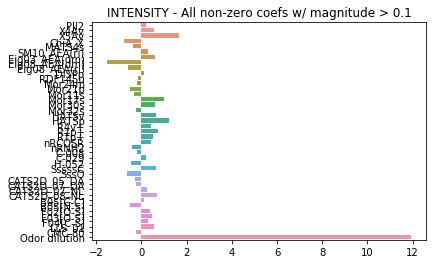

In [15]:
sb.barplot(y=list(above_point_one_coef.keys()), x=list(above_point_one_coef.values())).set_title('INTENSITY - All non-zero coefs w/ magnitude > 0.1')


It is pretty obvious that our lasso uses odor dilution to ballpark the intensity of a sample. With the high concentration of any chemical given a 12 point increase in predicted intensity. As our odor diltion is a binary variable we can measure the exact effect of this coefficent on prediction. 

The low dilutions are scored 12 points lower than higher dilutions as all other variables constant between sample of the same chemical. This behaviour explains the high predictive accuray of the LASSO intensity model and was noted in the write ups of some teams in the DREAM challenge.

In [16]:
# Where our predictions begin for intensity
model.intercept_

48.064372629020326

## Fruit

In [17]:
# FRUIT - R = 0.34
lasso_fruit_all = joblib.load(path_to_models + 'lasso_FRUIT_all.pkl')
model = lasso_fruit_all.steps[3][1]

In [18]:
non_zero_coef = {}
above_point_one_coef = {}
count = -1
for coef in model.coef_:
    count+=1
    if coef > 0 or coef < 0:
        non_zero_coef[X.columns[count]] = coef
    if coef > 0.1 or coef < -0.1:
        above_point_one_coef[X.columns[count]] = coef
        

In [19]:
# 116 non-zero coefficients
len(non_zero_coef)
non_zero_coef
## 20 above 0.1 in absolute value
len(above_point_one_coef)
above_point_one_coef

29

{'nR03': 0.23004099744926437,
 'SRW03': 0.020881354479949116,
 'SM3_X': 0.007339891518911011,
 'SpMax_B(s)': 0.13873583554849486,
 'MATS3s': 0.09247637593542499,
 'MATS4s': -0.13862189442613196,
 'GATS6v': 0.3824784737095839,
 'JGI7': 0.06586516183615895,
 'SpMin4_Bh(s)': 0.3071593231155332,
 'Eig08_EA(ri)': -0.7960017730608977,
 'Eig09_AEA(dm)': -0.0831414457231169,
 'TDB09i': 0.4843534991965219,
 'Mor27u': 0.4029834543323497,
 'Mor08i': 0.314364343280805,
 'Mor10i': -0.014960472146584452,
 'HATS1v': -0.10382895340293583,
 'nCconj': 0.15971241029145125,
 'nOxiranes': 0.061979201971980626,
 'O-057': -0.46101104264747494,
 'CATS2D_07_DD': -0.017751161381445515,
 'CATS2D_05_DA': -0.5059523828682564,
 'CATS2D_09_DL': -0.09703539582551149,
 'CATS2D_02_AA': 1.0520932660108988,
 'B02[C-S]': -0.9467204979758461,
 'B03[N-O]': -0.3453063527810224,
 'B05[C-O]': 0.3581979399810543,
 'DLS_06': 0.7008803967981168,
 'LLS_02': 0.1253603991768309,
 'Odor dilution': 0.7619440519916348}

20

{'nR03': 0.23004099744926437,
 'SpMax_B(s)': 0.13873583554849486,
 'MATS4s': -0.13862189442613196,
 'GATS6v': 0.3824784737095839,
 'SpMin4_Bh(s)': 0.3071593231155332,
 'Eig08_EA(ri)': -0.7960017730608977,
 'TDB09i': 0.4843534991965219,
 'Mor27u': 0.4029834543323497,
 'Mor08i': 0.314364343280805,
 'HATS1v': -0.10382895340293583,
 'nCconj': 0.15971241029145125,
 'O-057': -0.46101104264747494,
 'CATS2D_05_DA': -0.5059523828682564,
 'CATS2D_02_AA': 1.0520932660108988,
 'B02[C-S]': -0.9467204979758461,
 'B03[N-O]': -0.3453063527810224,
 'B05[C-O]': 0.3581979399810543,
 'DLS_06': 0.7008803967981168,
 'LLS_02': 0.1253603991768309,
 'Odor dilution': 0.7619440519916348}

Text(0.5,1,'FRUIT - All non-zero coefs w/ magnitude > 0.1')

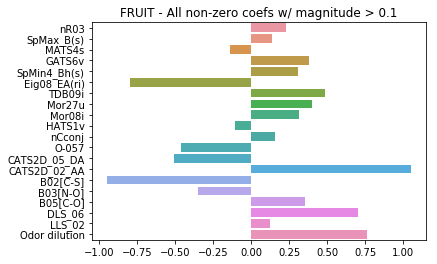

In [20]:
sb.barplot(y=list(above_point_one_coef.keys()), x=list(above_point_one_coef.values())).set_title('FRUIT - All non-zero coefs w/ magnitude > 0.1')


Predictions for fruit obtained a 0.34 correlation with actual target values. 

In [21]:
# Where our predictions begin for fruit
model.intercept_

19.29685423847622